In [1]:
# set up spark
import sys
import os
pyspark_libs_dir = "/home/gaoxiang/apps/spark/python/lib/"
sys.path += [ pyspark_libs_dir + x for x in os.listdir(pyspark_libs_dir) ]
from pyspark import *
from pyspark.sql import *
spark = SparkSession.builder.getOrCreate()

# set up python
import matplotlib.pyplot as plt
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
universe = spark.read.parquet("/mnt/data/gaoxiang/tables/StructureUniverse")
universe.show()
print('total items:', universe.count())

+--------------------+-------+--------------------+--------+
|              smiles|   mass|                  fg|  source|
+--------------------+-------+--------------------+--------+
|CNC(C=CC)C(C=C)C1CC1| 165.28|[false,false,fals...|[12.smi]|
|CNCC12COC1(C)C(N)CN2|171.244|[false,false,fals...|[12.smi]|
|CC1C2CCC1C1(CNC(=...|179.263|[false,false,true...|[13.smi]|
|C1C2NC1C13CC=C(OC...|178.235|[false,false,fals...|[13.smi]|
|C1CC2=C(N1)N(C=N2...|177.211|[false,false,fals...|[13.smi]|
|OC1=C2OC(=O)C2=CC...|161.116|[false,false,fals...|[12.smi]|
|OC(=O)C1=C(C#N)C2...|178.191|[true,false,false...|[13.smi]|
|CC1C2ONC(=O)C(N)C...|186.211|[false,false,true...|[13.smi]|
|CC=C1C2C3CN2CCCC1CC3|177.291|[false,false,fals...|[13.smi]|
|CCOCC12C=CC(C)N1C...|181.235|[false,true,false...|[13.smi]|
|CC(O)C1C(=O)C2CC1...|180.203|[false,false,fals...|[13.smi]|
|CC(C)C1C2C1C(C)=C...|179.307|[false,false,fals...|[13.smi]|
|CC1CC11OC2CC2CC=C...|178.231|[false,true,false...|[13.smi]|
|CN1NC=CC1=C1OCC(O...|18

Statistics on mass

In [3]:
counts = universe.groupBy('mass').count()
counts_local = counts.collect()
print('number of different masses:',len(counts_local))

number of different masses: 8730


Maximum number of structures per mass: 23178805
Average number of structures per mass: 111781.315808


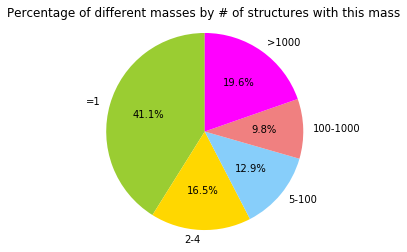

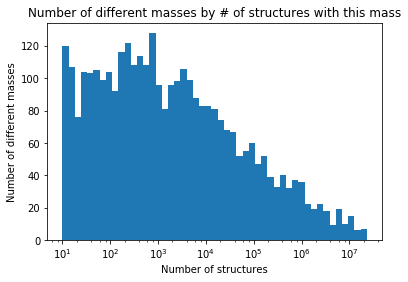

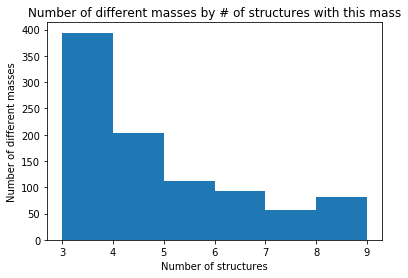

In [4]:
counts_only = [ x['count'] for x in counts_local ]
maxcount = max(counts_only)
avgcount = sum(counts_only)/len(counts_only)
print("Maximum number of structures per mass:",maxcount)
print("Average number of structures per mass:",avgcount)

# 1 structures vs >1 structures
labels = '=1', '2-4', '5-100', '100-1000', '>1000'
sizes = [ len([x for x in counts_only if x==1]),
          len([x for x in counts_only if x>=2 and x<=4]),
          len([x for x in counts_only if x>=5 and x<=100]),
          len([x for x in counts_only if x>=100 and x<=1000]),
          len([x for x in counts_only if x>1000]) ]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'magenta']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Percentage of different masses by # of structures with this mass')
plt.show()

# > 10 structures
plt.hist(counts_only, bins=np.logspace(1, np.log10(maxcount), 50))
plt.gca().set_xscale("log")
plt.title('Number of different masses by # of structures with this mass')
plt.ylabel('Number of different masses')
plt.xlabel('Number of structures')
plt.show()

# <10 structures
plt.hist(counts_only, bins=range(3,10))
plt.title('Number of different masses by # of structures with this mass')
plt.ylabel('Number of different masses')
plt.xlabel('Number of structures')
plt.show()

In [5]:
umfg = universe.dropDuplicates(['mass', 'fg'])
fgcounts = umfg.groupBy('mass').count()
fgcounts_local = fgcounts.collect()

Maximum number of different fgs per mass: 1396
Average number of different fgs per mass: 18.1144329897


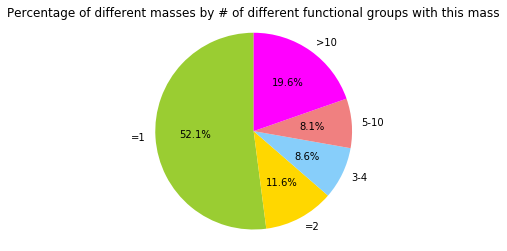

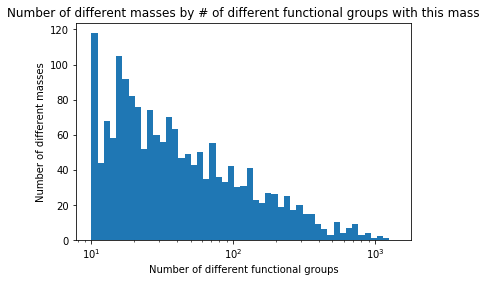

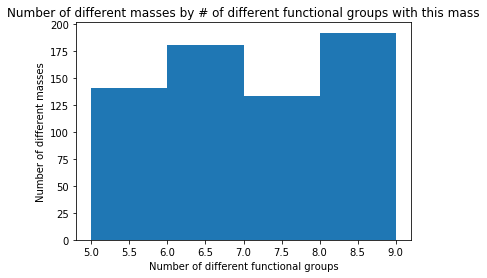

In [6]:
counts_only = [ x['count'] for x in fgcounts_local ]
maxcount = max(counts_only)
avgcount = sum(counts_only)/len(counts_only)
print("Maximum number of different fgs per mass:",maxcount)
print("Average number of different fgs per mass:",avgcount)

# 1 structures vs >1 structures
labels = '=1', '=2', '3-4', '5-10', '>10'
sizes = [ len([x for x in counts_only if x==1]),
          len([x for x in counts_only if x==2]),
          len([x for x in counts_only if x==3 or x==4]),
          len([x for x in counts_only if x>=5 and x<=10]),
          len([x for x in counts_only if x>10]) ]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'magenta']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Percentage of different masses by # of different functional groups with this mass')
plt.show()

# > 10 structures
plt.hist(counts_only, bins=np.logspace(1, np.log10(maxcount), 50))
plt.gca().set_xscale("log")
plt.title('Number of different masses by # of different functional groups with this mass')
plt.ylabel('Number of different masses')
plt.xlabel('Number of different functional groups')
plt.show()

# <10 structures
plt.hist(counts_only, bins=range(5,10))
plt.title('Number of different masses by # of different functional groups with this mass')
plt.ylabel('Number of different masses')
plt.xlabel('Number of different functional groups')
plt.show()

In [7]:
mfgcounts = universe.groupBy('mass','fg').count()
mfgcounts_local = mfgcounts.collect()

Maximum number of structures per (m,fg): 5199705
Average number of structures per (m,fg): 6170.84265741


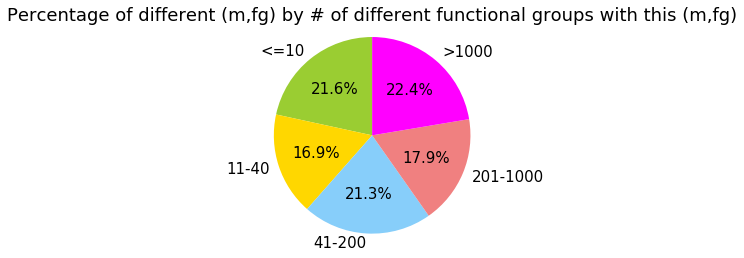

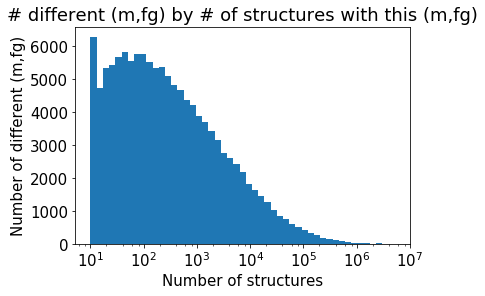

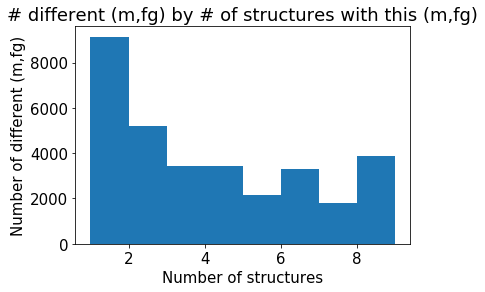

In [13]:
counts_only = [ x['count'] for x in mfgcounts_local ]
maxcount = max(counts_only)
avgcount = sum(counts_only)/len(counts_only)
print("Maximum number of structures per (m,fg):",maxcount)
print("Average number of structures per (m,fg):",avgcount)

# 1 structures vs >1 structures
labels = '<=10', '11-40', '41-200', '201-1000', '>1000'
sizes = [ len([x for x in counts_only if x<=10]),
          len([x for x in counts_only if x>=11 and x<=40]),
          len([x for x in counts_only if x>=41 and x<=200]),
          len([x for x in counts_only if x>=201 and x<=1000]),
          len([x for x in counts_only if x>1000]) ]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'magenta']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Percentage of different (m,fg) by # of different functional groups with this (m,fg)')
plt.show()

# > 10 structures
matplotlib.rcParams.update({'font.size': 15})
plt.hist(counts_only, bins=np.logspace(1, np.log10(maxcount), 50))
plt.gca().set_xscale("log")
plt.title('# different (m,fg) by # of structures with this (m,fg)')
plt.ylabel('Number of different (m,fg)')
plt.xlabel('Number of structures')
plt.show()

# <10 structures
plt.hist(counts_only, bins=range(1,10))
plt.title('# different (m,fg) by # of structures with this (m,fg)')
plt.ylabel('Number of different (m,fg)')
plt.xlabel('Number of structures')
plt.show()